In [ ]:
!pip install -q -U watermark
!pip install -qq transformers

#!pip3 install ktrain

%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

CPython 3.6.9
IPython 5.5.0

numpy 1.18.5
pandas 1.1.4
torch 1.7.0+cu101
transformers 4.0.0


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#to clean text
import spacy
#to plot word clouds
from wordcloud import WordCloud,STOPWORDS

from collections import Counter

In [ ]:
df = pd.read_csv("financial_news_sentiment.csv",encoding='cp437',header=None)
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
#some df processing
df = df.rename(columns = {0:'sentiment', 1:'finance_news'})
df.head()

,sentiment,finance_news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
df['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

## Any null values and duplicates?

In [ ]:
df.isnull().sum().any()

False

Good. No null values

Duplicates?


In [ ]:
df.duplicated().sum()

6

In [ ]:
#remove duplicates
df.drop_duplicates(inplace=True)

length of original df is 4840
length of modified df is 1812
Modified Equal class distribution


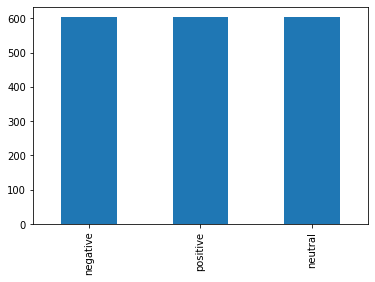

In [ ]:
#class distribution
print("length of original df is", len(df))

#print("Original class distribution")
#df['sentiment'].value_counts().plot(kind='bar')
#note: tried with the original class distribution, the model isn't able to predict negative at all due to less samples.

#make the class distribution equal to negative samples(smallest)
df_negative = df[df['sentiment']=='negative']
df_neutral=df[df['sentiment']=='neutral']
df_positive = df[df['sentiment']=='positive']

neg_samples_cnt=len(df_negative)
df_neutral = df_neutral.sample(n=neg_samples_cnt)
df_positive = df_positive.sample(n=neg_samples_cnt)

df = pd.concat([df_negative,df_neutral,df_positive], ignore_index=True)
print("length of modified df is",len(df))
print("Modified Equal class distribution")
df['sentiment'].value_counts().plot(kind='bar')

## Text cleaning

In [ ]:
nlp = spacy.load('en')

def normalise(msg):
    
    doc = nlp(msg)
    res = []
    
    for token in doc:
        #Removing Stop words and words out of vocabulary
        if token.is_stop or token.is_punct or token.is_space or not(token.is_oov): 
            pass
        else:
            res.append(token.lemma_.lower())
            
    return res

In [ ]:
df['finance_news_tokens'] = df['finance_news'].apply(normalise)
df.head()

,sentiment,finance_news,finance_news_tokens
0,negative,The international electronic industry company ...,"[international, electronic, industry, company,..."
1,negative,A tinyurl link takes users to a scamming site ...,"[tinyurl, link, take, user, scamme, site, prom..."
2,negative,"Compared with the FTSE 100 index , which rose ...","[compare, ftse, 100, index, rise, 36.7, point,..."
3,negative,"Compared with the FTSE 100 index , which rose ...","[compare, ftse, 100, index, rise, 94.9, point,..."
4,negative,One of the challenges in the oil production in...,"[challenge, oil, production, north, sea, scale..."


# Visuals in each sentiment
NOTE: Wordclouds are NOT text analytics. Instead, use 'lda' or 'most common words'(lemmatized and removing stop words) for visualisation. wordclouds are optimized to look good, so DONOT use it.

## overall representation most common words

In [ ]:
words_collection = Counter([item for sublist in df['finance_news_tokens'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,eur,564
1,company,360
2,mn,337
3,profit,251
4,finnish,246
5,`,233
6,year,231
7,say,229
8,sale,227
9,net,215


In [ ]:
# word_string = " ".join(words_collection)

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white', 
#                       max_words=1500, 
#                       width=1000,
#                       height=650
#                          ).generate(word_string)

In [ ]:
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

Split df based on sentiment

In [ ]:
df_positive = df[df['sentiment']=='positive']
df_neutral = df[df['sentiment']=='neutral']
df_negative = df[df['sentiment']=='negative']

## Positive Sentiment most common words

In [ ]:
words_collection = Counter([item for sublist in df_positive['finance_news_tokens'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,eur,196
1,company,125
2,`,112
3,mn,105
4,say,103
5,year,102
6,finnish,98
7,net,86
8,sale,81
9,profit,81


In [ ]:
# word_string = " ".join(words_collection)

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white', 
#                       max_words=1500, 
#                       width=1000,
#                       height=650
#                          ).generate(word_string)

In [ ]:
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

## Negative sentiment most common words

In [ ]:
words_collection = Counter([item for sublist in df_negative['finance_news_tokens'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,eur,325
1,mn,224
2,profit,159
3,company,108
4,net,104
5,year,103
6,sale,102
7,finnish,102
8,period,91
9,quarter,90


In [ ]:
# word_string = " ".join(words_collection)

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white', 
#                       max_words=1500, 
#                       width=1000,
#                       height=650
#                          ).generate(word_string)

In [ ]:
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

## Neutral sentiment most common words

In [ ]:
words_collection = Counter([item for sublist in df_neutral['finance_news_tokens'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_word,count
0,company,127
1,`,71
2,share,60
3,business,49
4,say,48
5,service,47
6,finnish,46
7,sale,44
8,eur,43
9,new,43


In [ ]:
# word_string = " ".join(words_collection)

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                           background_color='white', 
#                       max_words=1500, 
#                       width=1000,
#                       height=650
#                          ).generate(word_string)

In [ ]:
# plt.figure(figsize=(20,10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [ ]:
class_names = ['negative', 'neutral', 'positive']

convert sentiment into numbers and join the finance news tokens list into string before sending it to BERT for training and testing.

In [ ]:
#convert sentiment string to target
#target = 0:negative, 1: neutral, 2: positive
def sentiment_to_label(sentiment):
  if sentiment=='positive':
    return 2
  elif sentiment=='neutral':
    return 1
  else:
    return 0

df['target']=df['sentiment'].apply(sentiment_to_label)

#combine tokens into string
df['finance_news_cleaned']=df['finance_news_tokens'].apply(lambda tokens : " ".join(tokens))

#keep only relevant columns
keep_columns = ['target', 'finance_news_cleaned']
df=df[keep_columns]
df.head()

,target,finance_news_cleaned
0,0,international electronic industry company elco...
1,0,tinyurl link take user scamme site promise use...
2,0,compare ftse 100 index rise 36.7 point 0.6 day...
3,0,compare ftse 100 index rise 94.9 point 1.6 day...
4,0,challenge oil production north sea scale forma...


# load BERT model tokenizer and encode_plus 

In [ ]:
#load bert base model that is case senstitive
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
#maximum length of tokens fed into bert model
MAX_LEN = 160

class TwitterDataset():

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    #using encode_plus to encode the reviews 
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

# train-val-test split

In [ ]:
#split dataset into 60-20-20-train-val-test dataset
import torch
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df, test_size=0.4,train_size=0.6,stratify=df['target'],shuffle=True,random_state=42)
df_test, df_val = train_test_split(df_temp, test_size = 0.5,train_size =0.5, stratify=df_temp['target'],shuffle=True,random_state=42)

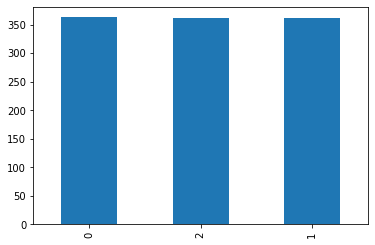

In [ ]:
df_train['target'].value_counts().plot(kind='bar')

In [ ]:
print("length of train dataset is ", len(df_train))
print("length of val dataset is ", len(df_val))
print("length of test dataset is ", len(df_test))

length of train dataset is  1087
length of val dataset is  363
length of test dataset is  362


# DataLoader

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = TwitterDataset(
    reviews=df.finance_news_cleaned.to_numpy(),
    targets=df.target.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  
  #split data into batches
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 16

from torch.utils.data import DataLoader
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

# Let's now load the basic [BertModel](https://huggingface.co/transformers/model_doc/bert.html#bertmodel) and build our sentiment classifier on top of it. Load the model using:

In [ ]:
from transformers import BertModel
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
import torch.nn as nn
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    out = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(out[1])
    return self.out(output)

Note that our sentiment classifier takes the BERT backbone and adds a dropout layer (for regularization) and a linear dense layer, which we train using cross-entropy. Let's create an instance and move it to the GPU:

In [ ]:
device = torch.device("cuda")

model = SentimentClassifier(len(class_names))
model = model.to(device)


# Training

To train the model, we will use the AdamW optimizer and a linear learning-rate scheduler with no warmup steps, along with the cross-entropy loss. Five epochs (full passes through the training data should be enough) should be enough, but you can experiment with more epochs.

In [ ]:
from transformers import AdamW

EPOCHS = 10
from transformers import get_linear_schedule_with_warmup
from torch.nn import functional as F

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  #TODO: freeze the pre-trained BERT layers and train only the classifier
  #option 1: code snippet throws errror though it has been accepted on github
  #for param in model.bert.bert.parameters():
  #  param.requires_grad = False
  
  #option 2: code snippet works fine but throws error during training.
  '''
  for name, param in model.named_parameters():
	  if 'classifier' not in name: # classifier layer
		  param.requires_grad = False
  '''

  for batch in data_loader:
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    targets = batch['targets']

    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    targets = targets.to(device)
    
    
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask,
    )
    #print("outputs is ", outputs)
    #NOTE: donot include softmax function in training as pytorch automatically 
    #does that for you. include only in testing.

    #print("softmaxed outputs is ",outputs)
    #calculate y_pred
    _, y_pred = torch.max(outputs, dim=1)
    
    #calculate loss
    loss = loss_fn(outputs, targets)

    temp = 0

    for elem in range(len(targets)):
      if targets[elem] == y_pred[elem]:
        temp += 1

    correct_predictions += temp
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  with torch.no_grad():
    losses = []
    correct_predictions = 0
    
    # TODO: Q9. Reproduce the above code but only evaluate the model (without any weight updates).

    for batch in data_loader:
      input_ids = batch['input_ids']
      attention_mask = batch['attention_mask']
      targets = batch['targets']

      input_ids = input_ids.to(device)
      attention_mask = attention_mask.to(device)
      targets = targets.to(device)


      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      
      outputs = F.softmax(outputs, dim=1)
      loss = loss_fn(outputs, targets)

      _, y_pred = torch.max(outputs, dim=1)
      
      temp = 0

      for elem in range(len(targets)):
        if targets[elem] == y_pred[elem]:
          temp += 1

      correct_predictions += temp
      losses.append(loss.item())


  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
#calculate time taken for the cell - pretty nice feature huh? 
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  # TODO: Q10. Complete the code below to track train and test accuracy.losses
  # Each data loader has 16 samples, so total number of examples trained / evaluated will be size of data loader * 16

  train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(train_data_loader) * 16)

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(model, test_data_loader, loss_fn, device, len(test_data_loader) * 16)

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss 0.9284909713794204 accuracy 0.5542279411764706


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val   loss 0.8145585811656454 accuracy 0.7717391304347826

Epoch 2/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.49611784298630324 accuracy 0.8079044117647058


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 0.7491931707962699 accuracy 0.8097826086956522

Epoch 3/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.2907795099377194 accuracy 0.8988970588235294


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Val   loss 0.7420859958814539 accuracy 0.7880434782608695

Epoch 4/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.1563959087156143 accuracy 0.9503676470588235


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 0.7384558553281038 accuracy 0.7989130434782609

Epoch 5/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.0986700742984848 accuracy 0.9733455882352942


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 0.7498988664668539 accuracy 0.7934782608695652

Epoch 6/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.07679370743212263 accuracy 0.9788602941176471


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.7577176819676938 accuracy 0.782608695652174

Epoch 7/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.041379539932891285 accuracy 0.9898897058823529


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.745050873445428 accuracy 0.7934782608695652

Epoch 8/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.02327931522792342 accuracy 0.9935661764705882


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.7446040562961412 accuracy 0.7934782608695652

Epoch 9/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.024365569546181874 accuracy 0.9935661764705882


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.7399396300315857 accuracy 0.7989130434782609

Epoch 10/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.007369541068756542 accuracy 0.9981617647058824


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 0.7379379298376001 accuracy 0.7989130434782609

CPU times: user 3min 27s, sys: 2min 9s, total: 5min 36s
Wall time: 5min 43s


Note that we're storing the best model, indicated by the highest validation accuracy.

Plot train and validation accuracy as a function of epoch count.

<function matplotlib.pyplot.show>

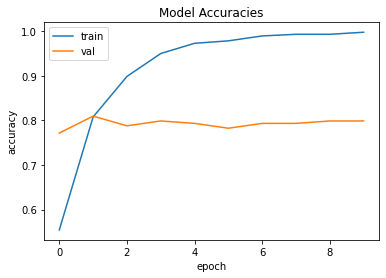

In [ ]:
# TODO: Q11. Plot train/validation accuracies.
import matplotlib.pyplot as plt

plt.plot(history['train_acc'])
plt.plot(history['val_acc'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

In [ ]:
train_acc, val_acc

(0.9981617647058824, 0.7989130434782609)

You might try to fine-tune the parameters (learning rate, batch size) a bit more if accuracy is not good enough.


# Evaluation

We'll define a helper function to get the predictions from our model:

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

This is similar to the evaluation function, except that we're storing the text of the reviews and the predicted probabilities (by applying the softmax on the model outputs):

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Let us compare true sentiment vs predicted sentiment by plotting a confusion matrix of `y_test` vs `y_pred`.

In [ ]:
cnt = 0
for i in range(len(y_test)):
  if y_test[i] == y_pred[i]:
    cnt += 1

cnt = cnt / len(y_test)
print(f'Test Accuracy is {cnt}')

Test Accuracy is 0.8121546961325967


In [ ]:
# TODO. Q12. Plot the 3x3 confusion matrix and show that the model finds it a bit difficult to classify neutral reviews.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

conf_mat_df = pd.DataFrame(cm)
print(conf_mat_df)


     0   1   2
0  107   5   8
1    7  95  19
2   10  19  92


In [ ]:
#Other Evaluation metrics
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.86      0.89      0.88       120
     neutral       0.80      0.79      0.79       121
    positive       0.77      0.76      0.77       121

    accuracy                           0.81       362
   macro avg       0.81      0.81      0.81       362
weighted avg       0.81      0.81      0.81       362



#Final Notes:
Ways to improve:
1. Increase no of epochs, play with hyperparameter values like learning rate, batch size etc. 
2. The input feature vector for the BERT model is of length 160 currently. Play around with this length as well. 
3. code change required: currently uses 'review text' column in get_predictions function. this is from google play reviews dataset. do appropriate changes later.

# Stock Movement prediction using sentiment

In [ ]:
#read df
aapl_df = pd.read_csv('AAPL_test_dataset.csv')
aapl_df.head()

FileNotFoundError: ignored

Follow same data processing steps as training

Any null values and duplicates?

In [ ]:
aapl_df.isnull().sum().any()

No null values

In [ ]:
aapl_df.duplicated().sum()

In [ ]:
#remove duplicates
aapl_df.drop_duplicates(inplace=True)

Text cleaning

In [ ]:
nlp = spacy.load('en')

def normalise(msg):
    
    doc = nlp(msg)
    res = []
    
    for token in doc:
        #Removing Stop words and words out of vocabulary
        if token.is_stop or token.is_punct or token.is_space or not(token.is_oov): 
            pass
        else:
            res.append(token.lemma_.lower())
            
    return res

In [ ]:
aapl_df['news_tokens'] = aapl_df['News'].apply(normalise)
aapl_df.head()

In [ ]:
#convert Label column to lowercase and convert Label to target
aapl_df['Label']=aapl_df['Label'].str.lower()
aapl_df['target']=aapl_df['Label'].apply(sentiment_to_label)

#combine news_tokens into string
aapl_df['news_cleaned']=aapl_df['news_tokens'].apply(lambda tokens : " ".join(tokens))

aapl_df.head()

In [ ]:
def create_aapl_data_loader(df, tokenizer, max_len, batch_size):
  ds = TwitterDataset(
    reviews=df.news_cleaned.to_numpy(),
    targets=df.target.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  
  #split data into batches
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

#create aapl_test_data_loader to predict stock prices movement
aapl_test_data_loader = create_aapl_data_loader(aapl_df, tokenizer, MAX_LEN, BATCH_SIZE)

## Get predictions for aapl_test_data

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  aapl_test_data_loader
)

In [ ]:
cnt = 0
for i in range(len(y_test)):
  if y_test[i] == y_pred[i]:
    cnt += 1

cnt = cnt / len(y_test)
print(f'Test Accuracy is {cnt}')

In [ ]:
# TODO. Q12. Plot the 3x3 confusion matrix and show that the model finds it a bit difficult to classify neutral reviews.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

conf_mat_df = pd.DataFrame(cm)
print(conf_mat_df)


In [ ]:
#Other Evaluation metrics
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
def prediction_to_sentiment(y_pred):
  if y_pred==0:
    return 'negative'
  elif y_pred==1:
    return 'neutral'
  else:
    return 'positive'

In [ ]:
aapl_df['prediction']=y_pred 
aapl_df['prediction']=aapl_df['prediction'].apply(prediction_to_sentiment)
print(aapl_df.head())

#store the predictions in csv file
aapl_df.to_csv('aapl_test_dataset_predictions.csv',index=False,header=True)

# Testing 2

## Using Dow Jones Industrial Average dataset for testing.
Source: https://www.kaggle.com/aaron7sun/stocknews

In [ ]:
djia_news_df = pd.read_csv('DJIA_top25_news.csv')
djia_stock_df = pd.read_csv('DJIA_stock_price.csv')

print(djia_news_df.head())
print(djia_stock_df.head())

In [ ]:
print("shape of DJIA news df is",djia_news_df.shape)
print("shape of DJIA stock df is",djia_stock_df.shape)

In [ ]:
#Merge DJIA news and stock dfs into one
djia_df = djia_news_df.merge(djia_stock_df, how='inner', on='Date', left_index=True)

In [ ]:
#Show merged df
djia_df 

In [ ]:
#Combine top news headlines into one. 
combined_news = []
for row in range(len(djia_df)):
  combined_news.append(" ".join( [str(x) for x in djia_df.iloc[row,2:27]] ))
  

In [ ]:
#print sample combined_news
combined_news[0]